# Sales Data Analysis With Python

<h4> Key Objectives </h4>

- What is the overall sales trend?
- What are the top 10 products by sales?
- What are the most selling products?
- Which is the most preferred ship mode?
- Which are the most profitable category and sub-category?

<h4> Importing Required Libraries

In [1]:
#for Data Manipulation
import pandas as pd

#for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h4> Importing The Dataset

In [3]:
df = pd.read_excel('superstore_sales.xlsx')

<h4> Understanding The Data

In [6]:
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,2011-01-02,2011-01-06,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314.220,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276.102,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.456,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",666.840,4,0.0,253.320,81.26,High,2011


In [8]:
df.shape

(51290, 21)

In [9]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [11]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [12]:
#Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
order_id          51290 non-null object
order_date        51290 non-null datetime64[ns]
ship_date         51290 non-null datetime64[ns]
ship_mode         51290 non-null object
customer_name     51290 non-null object
segment           51290 non-null object
state             51290 non-null object
country           51290 non-null object
market            51290 non-null object
region            51290 non-null object
product_id        51290 non-null object
category          51290 non-null object
sub_category      51290 non-null object
product_name      51290 non-null object
sales             51290 non-null float64
quantity          51290 non-null int64
discount          51290 non-null float64
profit            51290 non-null float64
shipping_cost     51290 non-null float64
order_priority    51290 non-null object
year              51290 non-null int64
dtypes: datetime64[ns](2), float6

In [14]:
#Checking Null Values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [15]:
#Descriptive summary of dataset
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


________

### Exploratory Data Analysis

- #### WHAT IS THE OVERALL SALES TREND?

In [20]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [21]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [22]:
#Extract month and year from date column
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [29]:
#Grouping month year 
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

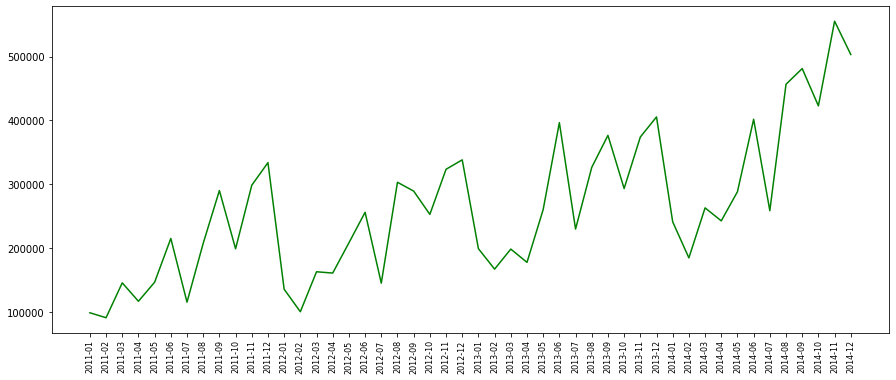

In [35]:
#Plotting the graph
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'],df_trend['sales'],color='Green')
plt.xticks(rotation='vertical',size=8)
plt.show()

- #### WHAT ARE THE TOP 10 PRODUCTS BY SALES?

In [41]:
#Grouping Product Name
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [44]:
#Sorting values by Sales Amount
prod_sales = prod_sales.sort_values('sales', ascending=False)

In [46]:
#Fetch the first 10 rows from the dataset

#Top 10 Products by Sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


- <h4> WHAT ARE THE MOST SELLING PRODUCTS?

In [54]:
most_selling_prod = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [57]:
most_selling_prod = most_selling_prod.sort_values('quantity', ascending=False)

In [58]:
#Top 5 Most Selling Products
most_selling_prod[:5]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


- <h4> WHAT IS THE MOST PREFERRED SHIP MODE?

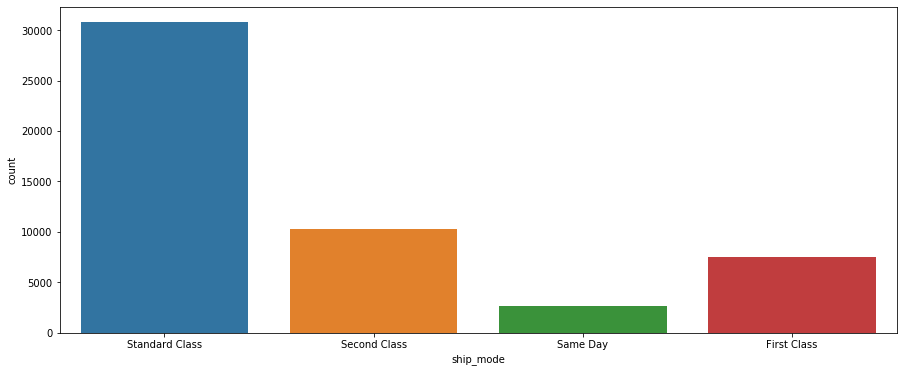

In [60]:
#Plotting Ship Mode
plt.figure(figsize=(15,6))
sns.countplot(df['ship_mode'])

- <h4> WHAT ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [64]:
#Grouping by Category and Sub_category
#df.groupby(['category','sub_category']).sum()['profit']
cat_subcat_profit = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [65]:
cat_subcat_profit.sort_values(['category','profit'], ascending = False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

- <h4> What is the Criticality of the couriers?

In [66]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [76]:
ord_pri = df.groupby('order_priority').sum()['quantity'].reset_index()

In [77]:
ord_pri

,order_priority,quantity
0,Critical,13439
1,High,54021
2,Low,8297
3,Medium,102555


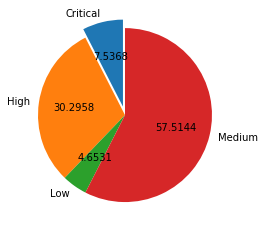

In [87]:
#Plotting chart for Order Priority

figureObject, axesObject = plt.subplots()
explodeTuple = (0.1, 0.0, 0.0, 0.0)

axesObject.pie(ord_pri['quantity'], explode=explodeTuple, labels=ord_pri['order_priority'], autopct='%1.4f', startangle=90)
plt.show()

- <h4> WHAT ARE THE TOP CONTRIBUTING REGIONS AND COUNTRIES BY PROFIT?

In [89]:
#Grouping by Region and Country
region_profit = pd.DataFrame(df.groupby(['region','country']).sum()['profit'])

In [88]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [97]:
region_profit=region_profit.sort_values(['profit','region'], ascending = False)

In [98]:
region_profit[:10]

,,profit
region,country,
North Asia,China,150683.08500
Central Asia,India,129071.83500
North,United Kingdom,111900.15000
Central,France,109029.00300
West,United States,108418.44890
Central,Germany,107322.82050
Oceania,Australia,105484.96300
North,Mexico,102818.09752
East,United States,91522.78000
